init

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = './data/global-energy-substitution.csv'
energy_substitution_data = pd.read_csv(file_path)

energy_substitution_data.head()


,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
0,World,OWID_WRL,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,5556
1,World,OWID_WRL,1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5833
2,World,OWID_WRL,1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,6111
3,World,OWID_WRL,1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,6389
4,World,OWID_WRL,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,6944


C:\Users\Martino\AppData\Local\Temp\ipykernel_7656\4040213899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_sources[strEP] = energy_sources.sum(axis=1)


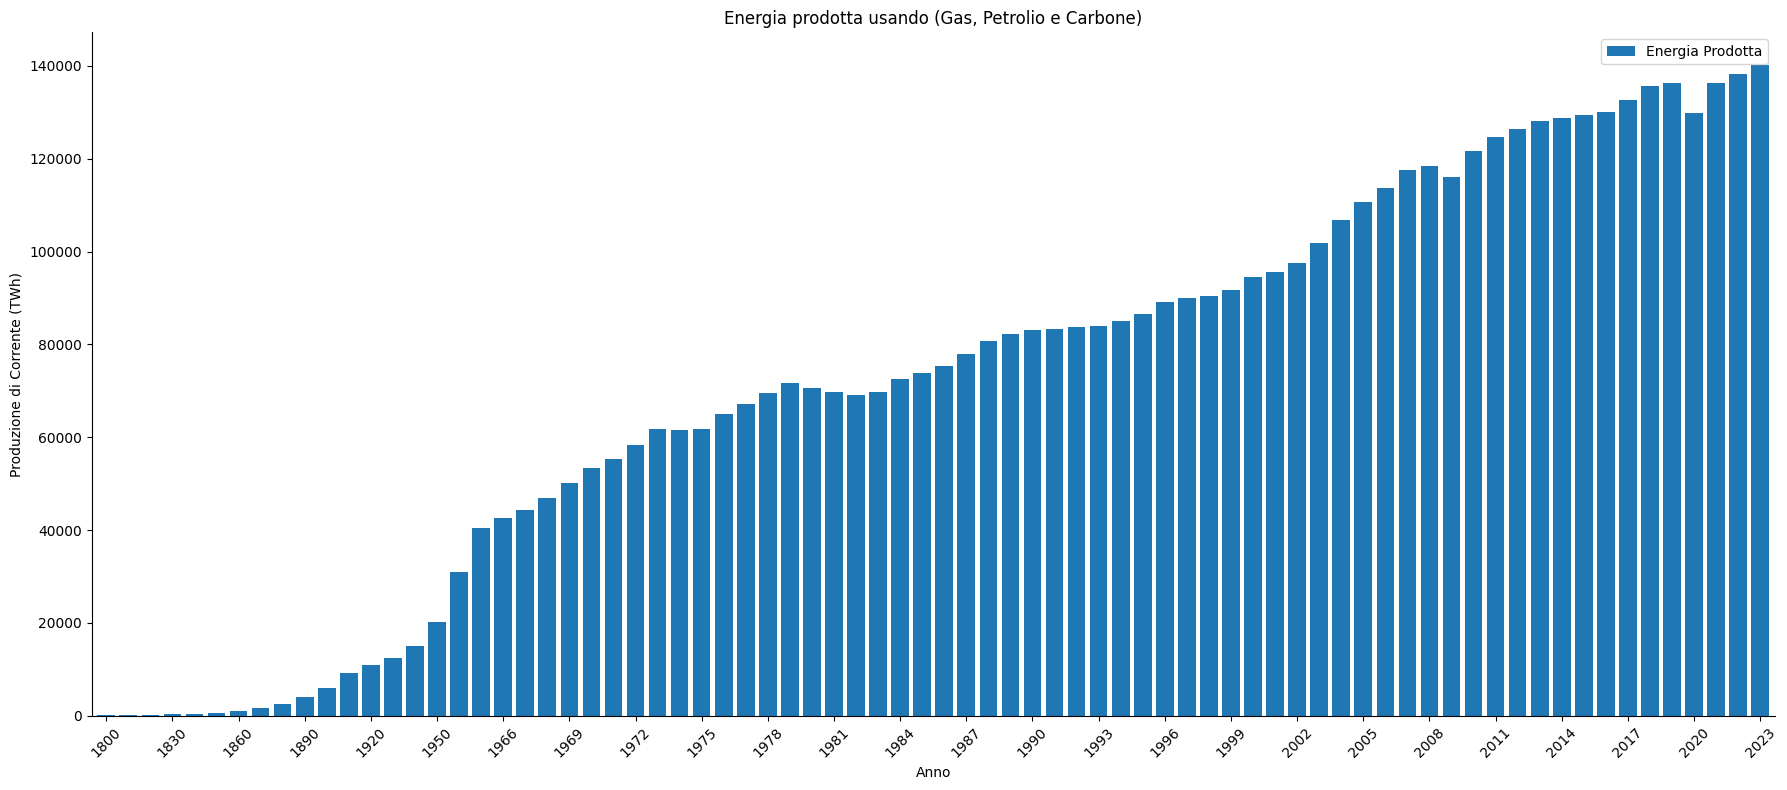

In [28]:
world_energy_data = energy_substitution_data[energy_substitution_data['Entity'] == 'World']

world_energy_data.set_index('Year', inplace=True)

strEP = 'Energia Prodotta'

energy_sources = world_energy_data[['Gas (TWh, substituted energy)', 'Oil (TWh, substituted energy)', 'Coal (TWh, substituted energy)']]

energy_sources[strEP] = energy_sources.sum(axis=1)

energy_sources_grouped = energy_sources[[strEP]]

total_energy_grouped = energy_sources_grouped.sum().sort_values(ascending=False)

ax = energy_sources_grouped.plot(kind='bar', stacked=True, figsize=(18, 8), width=0.8)

ticks_to_use = [label for i, label in enumerate(energy_sources.index) if i % 3 == 0]
ax.set_xticks(range(0, len(energy_sources), 3))
ax.set_xticklabels(ticks_to_use, rotation=45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: total_energy_grouped[x[1]], reverse=True)
handles, labels = zip(*sorted_handles_labels)

plt.title('Energia prodotta usando (Gas, Petrolio e Carbone)')
plt.xlabel('Anno')
plt.ylabel('Produzione di Corrente (TWh)')
plt.tight_layout()

plt.show()


C:\Users\Martino\AppData\Local\Temp\ipykernel_7656\1062858917.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  energy_sources['Total Energy Production'] = energy_sources.sum(axis=1)


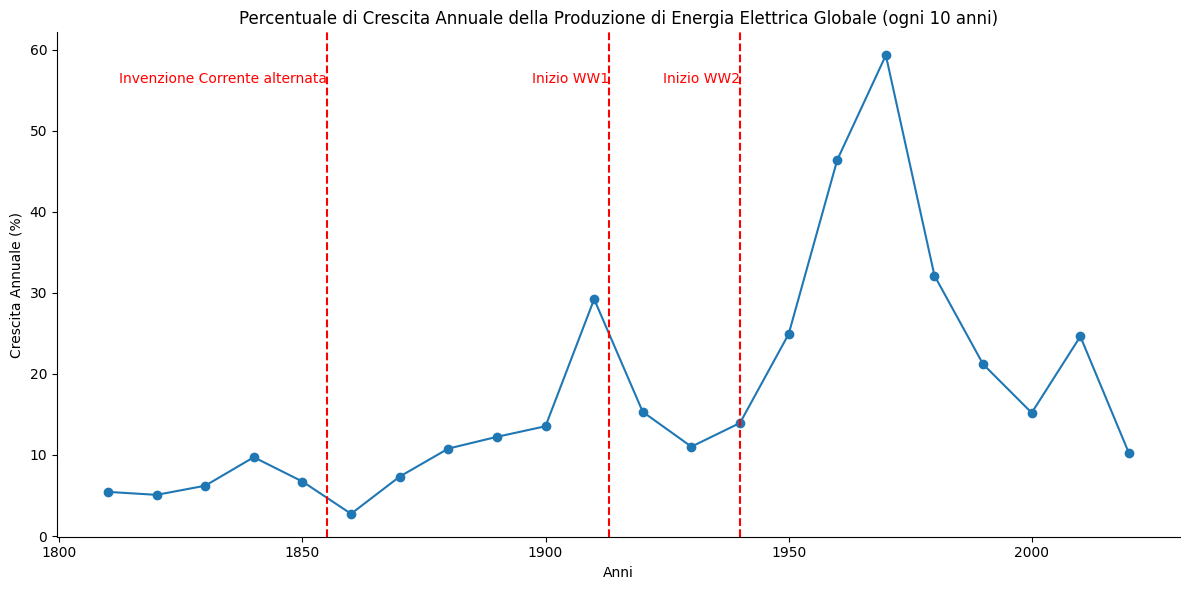

In [29]:
world_energy_data = energy_substitution_data[energy_substitution_data['Entity'] == 'World']

world_energy_data.set_index('Year', inplace=True)

filtered_data = world_energy_data[world_energy_data.index >= 1800]
filtered_data = filtered_data[filtered_data.index % 10 == 0]  # Solo gli anni divisibili per 10

energy_sources = filtered_data

energy_sources['Total Energy Production'] = energy_sources.sum(axis=1)

energy_sources['Yearly Growth (%)'] = energy_sources['Total Energy Production'].pct_change() * 100

energy_sources.dropna(subset=['Yearly Growth (%)'], inplace=True)

ax = energy_sources['Yearly Growth (%)'].plot(kind='line', figsize=(12, 6), marker='o')

cAlternata = 1855
plt.axvline(x=cAlternata, color='red', linestyle='--')
plt.text(cAlternata, ax.get_ylim()[1] * 0.9, 'Invenzione Corrente alternata', color='red', ha='right')

iniW1 = 1913
plt.axvline(x=iniW1, color='red', linestyle='--')
plt.text(iniW1, ax.get_ylim()[1] * 0.9, 'Inizio WW1', color='red', ha='right')

wViet = 1940
plt.axvline(x=wViet, color='red', linestyle='--')
plt.text(wViet, ax.get_ylim()[1] * 0.9, 'Inizio WW2', color='red', ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Percentuale di Crescita Annuale della Produzione di Energia Elettrica Globale (ogni 10 anni)')
plt.xlabel('Anni')
plt.ylabel('Crescita Annuale (%)')

plt.tight_layout()
plt.show()


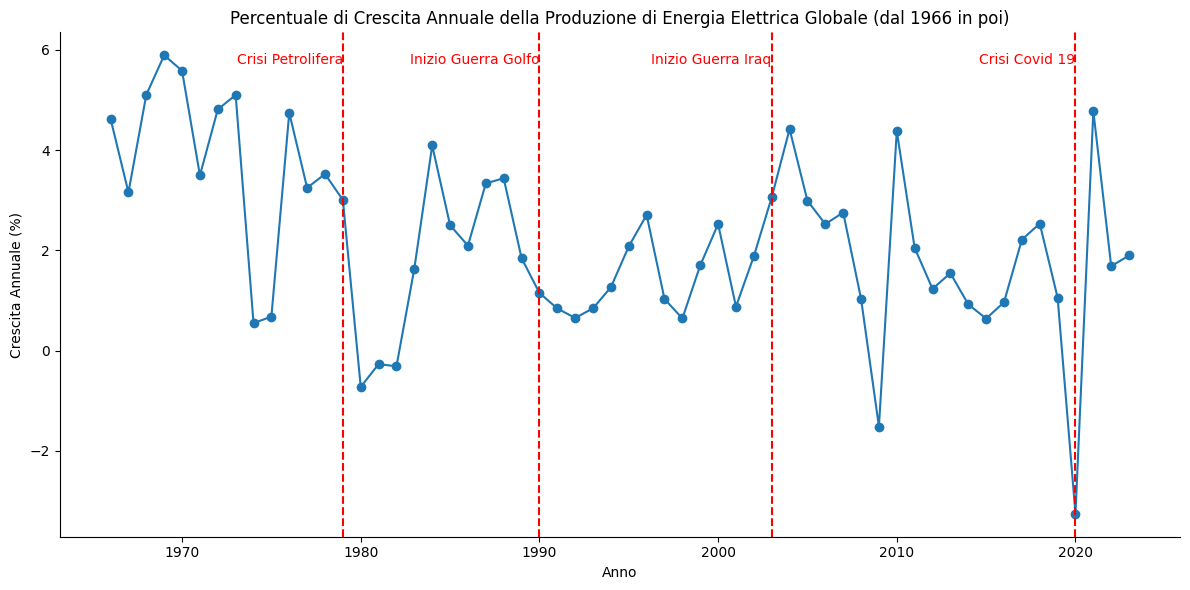

In [30]:
world_energy_data = energy_substitution_data[energy_substitution_data['Entity'] == 'World']

world_energy_data.set_index('Year', inplace=True)

energy_sources = world_energy_data.drop(columns=['Entity', 'Code'])

energy_sources['Total Energy Production'] = energy_sources.sum(axis=1)

energy_sources['Yearly Growth (%)'] = energy_sources['Total Energy Production'].pct_change() * 100

energy_sources.dropna(subset=['Yearly Growth (%)'], inplace=True)

energy_sources_filtered = energy_sources[energy_sources.index >= 1966]

ax = energy_sources_filtered['Yearly Growth (%)'].plot(kind='line', figsize=(12, 6), marker='o')

wGolf=1990
plt.axvline(x=wGolf, color='red', linestyle='--')
plt.text(wGolf, ax.get_ylim()[1] * 0.9, 'Inizio Guerra Golfo', color='red', ha='right')

wIraq=2003
plt.axvline(x=wIraq, color='red', linestyle='--')
plt.text(wIraq, ax.get_ylim()[1] * 0.9, 'Inizio Guerra Iraq', color='red', ha='right')

cPetr=1979
plt.axvline(x=cPetr, color='red', linestyle='--')
plt.text(cPetr, ax.get_ylim()[1] * 0.9, 'Crisi Petrolifera', color='red', ha='right')

cCovid=2020
plt.axvline(x=cCovid, color='red', linestyle='--')
plt.text(cCovid, ax.get_ylim()[1] * 0.9, 'Crisi Covid 19', color='red', ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Percentuale di Crescita Annuale della Produzione di Energia Elettrica Globale (dal 1966 in poi)')
plt.xlabel('Anno')
plt.ylabel('Crescita Annuale (%)')

plt.tight_layout()
plt.show()


In [31]:
average_growth = energy_sources['Yearly Growth (%)'].mean()

print(f"La crescita media annua della produzione globale di energia è: {average_growth:.2f}%")


La crescita media annua della produzione globale di energia è: 4.98%


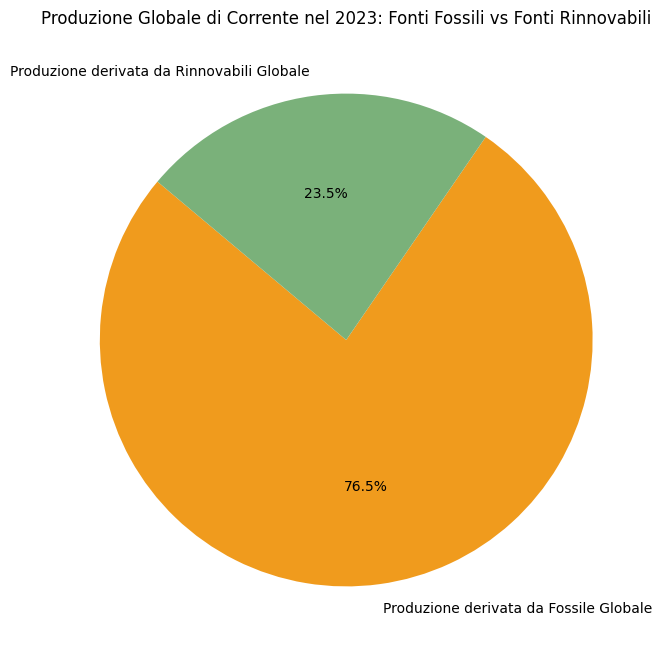

In [32]:
world_energy_data = energy_substitution_data[energy_substitution_data['Entity'] == 'World']

world_energy_data.set_index('Year', inplace=True)

energy_sources = world_energy_data.drop(columns=['Entity', 'Code'])

sources = ["Oil (TWh, substituted energy)", "Coal (TWh, substituted energy)", "Gas (TWh, substituted energy)"]

strFossili = 'Produzione derivata da Fossile Globale'

strGreen = 'Produzione derivata da Rinnovabili Globale'

energy_sources[strFossili] = energy_sources[sources].sum(axis=1)

energy_sources[strGreen] = energy_sources.drop(columns=sources + [strFossili]).sum(axis=1)

energy_sources_2023 = energy_sources.loc[2023, [strFossili, strGreen]]

plt.figure(figsize=(10, 8))
colors = ['#F09B1D', '#7AB17A']
plt.pie(energy_sources_2023, labels=energy_sources_2023.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Produzione Globale di Corrente nel 2023: Fonti Fossili vs Fonti Rinnovabili')

plt.show()


In [33]:
energy_2023 = world_energy_data.loc[2023]

total_energy_2023 = energy_2023[
    ['Other renewables (TWh, substituted energy)', 'Biofuels (TWh, substituted energy)', 
     'Solar (TWh, substituted energy)', 'Wind (TWh, substituted energy)', 
     'Hydropower (TWh, substituted energy)', 'Nuclear (TWh, substituted energy)', 
     'Gas (TWh, substituted energy)', 'Oil (TWh, substituted energy)', 
     'Coal (TWh, substituted energy)', 'Traditional biomass (TWh, substituted energy)']
].sum()

print("Total energy production in 2023: {:.2f} TWh".format(total_energy_2023))


Total energy production in 2023: 183230.07 TWh


In [34]:
energy_2023 = world_energy_data.loc[2023]

fossil_energy_2023 = energy_2023[
    ['Gas (TWh, substituted energy)', 'Oil (TWh, substituted energy)', 
     'Coal (TWh, substituted energy)']
].sum()

print("Total energy production in 2023: {:.2f} TWh".format(fossil_energy_2023))

Total energy production in 2023: 140230.67 TWh


In [35]:
fossil_percentage = (fossil_energy_2023 / total_energy_2023) * 100

fossil_percentage

76.53256363623473